In [1]:
import numpy as np
import os
from Bio import SeqIO
def load_embeddings(npy_folder_path, max_length, embedding_type='proteinbert'):
    features_dict = {}
    for filename in os.listdir(npy_folder_path):
        if filename.endswith('.npy'):
            protein_id = filename[:-4]
            feature = np.load(os.path.join(npy_folder_path, filename))
            squeezed_feature = np.squeeze(feature)
            if squeezed_feature.shape[0] > max_length:
                padded_feature = squeezed_feature[:max_length, :]
            else:
                padding = np.zeros((max_length - squeezed_feature.shape[0], squeezed_feature.shape[1]))
                padded_feature = np.vstack([squeezed_feature, padding])
            features_dict[protein_id] = padded_feature
    return features_dict

def create_one_hot_features(fasta_file, max_length, amino_acids='ACDEFGHIKLMNPQRSTVWY'):
    aa_to_onehot = {aa: np.eye(len(amino_acids))[i] for i, aa in enumerate(amino_acids)}
    one_hot_features_dict = {}
    for record in SeqIO.parse(fasta_file, "fasta"):
        sequence_id = record.id
        encoded_seq = np.array([aa_to_onehot.get(aa, np.zeros(len(amino_acids))) for aa in str(record.seq)])
        if len(encoded_seq) > max_length:
            encoded_seq = encoded_seq[:max_length]  # 截断超长序列
        padding_length = max_length - len(encoded_seq)
        if padding_length > 0:  # 仅当需要填充时进行填充
            padded_seq = np.pad(encoded_seq, ((0, padding_length), (0, 0)), 'constant')
        else:
            padded_seq = encoded_seq
        one_hot_features_dict[sequence_id] = padded_seq
    return one_hot_features_dict

# 更新最大长度为100
max_length = 183
fasta_file = 'amp_eval2.fasta'
proteinbert_path = 'bert_amp_eval2'
esm_path = 'esm_ebd_amp_eval2'

# 调用函数
one_hot_features = create_one_hot_features(fasta_file, max_length)
proteinbert_features = load_embeddings(proteinbert_path, max_length, 'proteinbert')
esm_features = load_embeddings(esm_path, max_length, 'esm')
def combine_features(one_hot_features, proteinbert_features, esm_features):
    combined_features_dict = {}
    for seq_id in one_hot_features:
        if seq_id in proteinbert_features and seq_id in esm_features:
            combined_feature = np.concatenate([
                proteinbert_features[seq_id], 
                esm_features[seq_id], 
                one_hot_features[seq_id]
            ], axis=1)
            combined_features_dict[seq_id] = combined_feature
    return combined_features_dict

amp_eval_combined_features = combine_features(one_hot_features, proteinbert_features, esm_features)

In [2]:
import numpy as np
import os
from Bio import SeqIO
def load_embeddings(npy_folder_path, max_length, embedding_type='proteinbert'):
    features_dict = {}
    for filename in os.listdir(npy_folder_path):
        if filename.endswith('.npy'):
            protein_id = filename[:-4]
            feature = np.load(os.path.join(npy_folder_path, filename))
            squeezed_feature = np.squeeze(feature)
            if squeezed_feature.shape[0] > max_length:
                padded_feature = squeezed_feature[:max_length, :]
            else:
                padding = np.zeros((max_length - squeezed_feature.shape[0], squeezed_feature.shape[1]))
                padded_feature = np.vstack([squeezed_feature, padding])
            features_dict[protein_id] = padded_feature
    return features_dict

def create_one_hot_features(fasta_file, max_length, amino_acids='ACDEFGHIKLMNPQRSTVWY'):
    aa_to_onehot = {aa: np.eye(len(amino_acids))[i] for i, aa in enumerate(amino_acids)}
    one_hot_features_dict = {}
    for record in SeqIO.parse(fasta_file, "fasta"):
        sequence_id = record.id
        encoded_seq = np.array([aa_to_onehot.get(aa, np.zeros(len(amino_acids))) for aa in str(record.seq)])
        if len(encoded_seq) > max_length:
            encoded_seq = encoded_seq[:max_length]  # 截断超长序列
        padding_length = max_length - len(encoded_seq)
        if padding_length > 0:  # 仅当需要填充时进行填充
            padded_seq = np.pad(encoded_seq, ((0, padding_length), (0, 0)), 'constant')
        else:
            padded_seq = encoded_seq
        one_hot_features_dict[sequence_id] = padded_seq
    return one_hot_features_dict

# 更新最大长度为100
max_length = 183
fasta_file = 'non_amp_eval2.fasta'
proteinbert_path = 'bert_non_amp_eval2'
esm_path = 'esm_ebd_non_amp_eval2'

one_hot_features = create_one_hot_features(fasta_file, max_length)
proteinbert_features = load_embeddings(proteinbert_path, max_length, 'proteinbert')
esm_features = load_embeddings(esm_path, max_length, 'esm')
def combine_features(one_hot_features, proteinbert_features, esm_features):
    combined_features_dict = {}
    for seq_id in one_hot_features:
        if seq_id in proteinbert_features and seq_id in esm_features:
            combined_feature = np.concatenate([
                proteinbert_features[seq_id], 
                esm_features[seq_id], 
                one_hot_features[seq_id]
            ], axis=1)
            combined_features_dict[seq_id] = combined_feature
    return combined_features_dict
decoy_amp_eval_combined_features = combine_features(one_hot_features, proteinbert_features, esm_features)

In [3]:
fasta_file = 'amp_test2.fasta'
proteinbert_path = 'bert_amp_test2'
esm_path = 'esm_ebd_amp_test2'
one_hot_features = create_one_hot_features(fasta_file, max_length)
proteinbert_features = load_embeddings(proteinbert_path, max_length, 'proteinbert')
esm_features = load_embeddings(esm_path, max_length, 'esm')
amp_test_combined_features = combine_features(one_hot_features, proteinbert_features, esm_features)

fasta_file = 'non_amp_test2.fasta'
proteinbert_path = 'bert_non_amp_test2'
esm_path = 'esm_ebd_non_amp_test2'
one_hot_features = create_one_hot_features(fasta_file, max_length)
proteinbert_features = load_embeddings(proteinbert_path, max_length, 'proteinbert')
esm_features = load_embeddings(esm_path, max_length, 'esm')
decoy_amp_test_combined_features = combine_features(one_hot_features, proteinbert_features, esm_features)

fasta_file = 'amp_train2.fasta'
proteinbert_path = 'bert_amp_train2'
esm_path = 'esm_ebd_amp_train2'
one_hot_features = create_one_hot_features(fasta_file, max_length)
proteinbert_features = load_embeddings(proteinbert_path, max_length, 'proteinbert')
esm_features = load_embeddings(esm_path, max_length, 'esm')
amp_train_combined_features = combine_features(one_hot_features, proteinbert_features, esm_features)

fasta_file = 'non_amp_train2.fasta'
proteinbert_path = 'bert_non_amp_train2'
esm_path = 'esm_ebd_non_amp_train2'
one_hot_features = create_one_hot_features(fasta_file, max_length)
proteinbert_features = load_embeddings(proteinbert_path, max_length, 'proteinbert')
esm_features = load_embeddings(esm_path, max_length, 'esm')
decoy_amp_train_combined_features = combine_features(one_hot_features, proteinbert_features, esm_features)

In [4]:
# 为数据分配标签
amp_train_labels = {key: 1 for key in amp_train_combined_features.keys()}
decoy_amp_train_labels = {key: 0 for key in decoy_amp_train_combined_features.keys()}

amp_test_labels = {key: 1 for key in amp_test_combined_features.keys()}
decoy_amp_test_labels = {key: 0 for key in decoy_amp_test_combined_features.keys()}

amp_eval_labels = {key: 1 for key in amp_eval_combined_features.keys()}
decoy_amp_eval_labels = {key: 0 for key in decoy_amp_eval_combined_features.keys()}

In [3]:
amp_eval_labels = {key: 1 for key in amp_eval_combined_features.keys()}
decoy_amp_eval_labels = {key: 0 for key in decoy_amp_eval_combined_features.keys()}

In [4]:
import torch
from torch.utils.data import Dataset, DataLoader

class AMPDataset(Dataset):
    def __init__(self, features_dict, labels_dict):
        self.features = features_dict
        self.labels = labels_dict
        self.ids = list(features_dict.keys())

    def __len__(self):
        return len(self.ids)

    def __getitem__(self, idx):
        protein_id = self.ids[idx]
        feature = self.features[protein_id]
        label = self.labels[protein_id]
        return torch.tensor(feature, dtype=torch.float32), torch.tensor(label, dtype=torch.long)

In [5]:
import torch
from torch.utils.data import Dataset, DataLoader

class AMPDataset(Dataset):
    def __init__(self, features_dict, labels_dict):
        self.features = features_dict
        self.labels = labels_dict
        self.ids = list(features_dict.keys())

    def __len__(self):
        return len(self.ids)

    def __getitem__(self, idx):
        protein_id = self.ids[idx]
        feature = self.features[protein_id]
        label = self.labels[protein_id]
        return torch.tensor(feature, dtype=torch.float32), torch.tensor(label, dtype=torch.long)
eval_features = {**amp_eval_combined_features, **decoy_amp_eval_combined_features}
eval_labels = {**amp_eval_labels, **decoy_amp_eval_labels}
eval_dataset = AMPDataset(eval_features, eval_labels)
eval_loader = DataLoader(eval_dataset, batch_size=12, shuffle=False)
# 创建训练和测试数据集
train_features = {**amp_train_combined_features, **decoy_amp_train_combined_features}
train_labels = {**amp_train_labels, **decoy_amp_train_labels}

test_features = {**amp_test_combined_features, **decoy_amp_test_combined_features}
test_labels = {**amp_test_labels, **decoy_amp_test_labels}

#eval_features = {**amp_eval_combined_features, **decoy_amp_eval_combined_features}
#eval_labels = {**amp_eval_labels, **decoy_amp_eval_labels}

train_dataset = AMPDataset(train_features, train_labels)
test_dataset = AMPDataset(test_features, test_labels)
#eval_dataset = AMPDataset(eval_features, eval_labels)

train_loader = DataLoader(train_dataset, batch_size=12, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=12, shuffle=False)
#eval_loader = DataLoader(eval_dataset, batch_size=12, shuffle=False)


In [5]:
import torch
from torch.utils.data import Dataset, DataLoader

class AMPDataset(Dataset):
    def __init__(self, features_dict, labels_dict):
        self.features = features_dict
        self.labels = labels_dict
        self.ids = list(features_dict.keys())

    def __len__(self):
        return len(self.ids)

    def __getitem__(self, idx):
        protein_id = self.ids[idx]
        feature = self.features[protein_id]
        label = self.labels[protein_id]
        return torch.tensor(feature, dtype=torch.float32), torch.tensor(label, dtype=torch.long)
eval_features = {**amp_eval_combined_features, **decoy_amp_eval_combined_features}
eval_labels = {**amp_eval_labels, **decoy_amp_eval_labels}
eval_dataset = AMPDataset(eval_features, eval_labels)
eval_loader = DataLoader(eval_dataset, batch_size=12, shuffle=False)

In [8]:
train_loader = DataLoader(train_dataset, batch_size=12, shuffle=True)
eval_loader = DataLoader(test_dataset, batch_size=12, shuffle=False)
test_loader = DataLoader(eval_dataset, batch_size=12, shuffle=False)

In [9]:
import torch.nn as nn
import torch.nn.functional as F

class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, (3, 3))
        self.conv2 = nn.Conv2d(16, 32, (3, 3))
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 44 * 899, 512)  # 根据你的数据调整维度
        self.fc2 = nn.Linear(512, 2)  # 输出两个类别

    def forward(self, x):
        x = x.unsqueeze(1)  # 增加一个通道维度
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 44 * 899)  # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [10]:
from sklearn.metrics import accuracy_score, roc_auc_score, matthews_corrcoef, confusion_matrix

def calculate_metrics(y_true, y_pred, y_scores):
    accuracy = accuracy_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_scores)
    mcc = matthews_corrcoef(y_true, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return accuracy, auc, mcc, sensitivity, specificity

In [11]:
import torch

# 检查CUDA是否可用，设置默认设备
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [14]:
import torch.optim as optim
import copy

# 模型、损失函数和优化器
model = CNNModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def train_and_validate(model, train_loader, val_loader, criterion, optimizer, num_epochs, device=device):
    import copy
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        
        train_loss = running_loss / len(train_loader.dataset)

        # 验证阶段
        model.eval()
        running_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_loss = running_loss / len(val_loader.dataset)
        epoch_acc = correct / total
        print(f'Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {epoch_acc*100:.2f}%')

        if epoch_acc > best_acc:
            best_acc = epoch_acc
            best_model_wts = copy.deepcopy(model.state_dict())
            torch.save(model.state_dict(), 'benchmark1_best_sequence_model2.pth')  # 指定文件路径保存模型
    # 加载最好的模型权重
    model.load_state_dict(best_model_wts)
    return model
def test_model(model, test_loader, criterion):
    model.eval()
    running_loss = 0.0
    all_labels = []
    all_predictions = []
    all_scores = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            scores = torch.nn.functional.softmax(outputs, dim=1)[:, 1]

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
            all_scores.extend(scores.cpu().numpy())

    final_loss = running_loss / len(test_loader.dataset)
    test_acc, test_auc, test_mcc, test_sens, test_spec = calculate_metrics(all_labels, all_predictions, all_scores)
    
    print(f'Test Loss: {final_loss:.4f}, Accuracy: {test_acc*100:.2f}%, '
          f'AUC: {test_auc:.4f}, SENS: {test_sens:.4f}, SPEC: {test_spec:.4f}, MCC: {test_mcc:.4f}')

In [15]:
model = train_and_validate(model, train_loader, eval_loader, criterion, optimizer, num_epochs=20)
test_model(model, test_loader, criterion)

Epoch 1/20 - Train Loss: 0.6817, Val Loss: 0.5051, Val Accuracy: 69.16%
Epoch 2/20 - Train Loss: 0.4150, Val Loss: 0.3757, Val Accuracy: 81.94%
Epoch 3/20 - Train Loss: 0.2914, Val Loss: 0.3282, Val Accuracy: 84.71%
Epoch 4/20 - Train Loss: 0.2323, Val Loss: 0.3446, Val Accuracy: 85.23%
Epoch 5/20 - Train Loss: 0.1908, Val Loss: 0.3182, Val Accuracy: 86.65%
Epoch 6/20 - Train Loss: 0.1513, Val Loss: 0.3665, Val Accuracy: 85.94%
Epoch 7/20 - Train Loss: 0.1274, Val Loss: 0.3300, Val Accuracy: 87.94%
Epoch 8/20 - Train Loss: 0.1061, Val Loss: 0.5664, Val Accuracy: 83.03%
Epoch 9/20 - Train Loss: 0.0808, Val Loss: 0.4018, Val Accuracy: 87.42%
Epoch 10/20 - Train Loss: 0.0602, Val Loss: 0.3932, Val Accuracy: 87.81%
Epoch 11/20 - Train Loss: 0.0464, Val Loss: 0.4284, Val Accuracy: 87.29%
Epoch 12/20 - Train Loss: 0.0353, Val Loss: 0.4315, Val Accuracy: 87.42%
Epoch 13/20 - Train Loss: 0.0376, Val Loss: 0.5096, Val Accuracy: 86.84%
Epoch 14/20 - Train Loss: 0.0216, Val Loss: 0.5404, Val Accu

Test Loss: 0.9152, Accuracy: 84.02%, AUC: 0.9256, SENS: 0.8277, SPEC: 0.8771, MCC: 0.6415


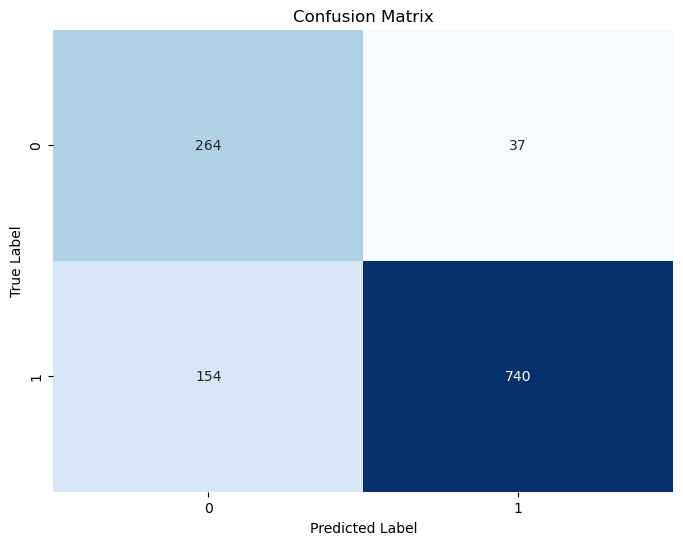

In [21]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import numpy as np
from sklearn.metrics import roc_auc_score, matthews_corrcoef, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


# 假设你的模型类为 CNNModel，已经被定义
# 初始化模型和设备
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = CNNModel().to(device)

# 加载模型
model_path = 'benchmark1_best_sequence_model.pth'
model.load_state_dict(torch.load(model_path, map_location=device))

# 定义损失函数
criterion = nn.CrossEntropyLoss()

def test_model(model, test_loader, criterion):
    model.eval()  # 设置模型为评估模式
    total = 0
    correct = 0
    running_loss = 0.0
    all_labels = []
    all_predictions = []
    all_scores = []

    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs.data, 1)
            scores = torch.nn.functional.softmax(outputs, dim=1)[:, 1]  # Assuming the second column has positive class probabilities
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            running_loss += loss.item() * inputs.size(0)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
            all_scores.extend(scores.cpu().numpy())

    avg_loss = running_loss / total
    accuracy = accuracy_score(all_labels, all_predictions)
    mcc = matthews_corrcoef(all_labels, all_predictions)
    auc = roc_auc_score(all_labels, all_scores)
    cm = confusion_matrix(all_labels, all_predictions)
    
    tn, fp, fn, tp = cm.ravel()
    sens = tp / (tp + fn)
    spec = tn / (tn + fp)

    print(f'Test Loss: {avg_loss:.4f}, Accuracy: {accuracy*100:.2f}%, AUC: {auc:.4f}, SENS: {sens:.4f}, SPEC: {spec:.4f}, MCC: {mcc:.4f}')
    np.save('seq_all_labels.npy', all_labels)
    np.save('seq_predictions.npy', all_predictions)
    # 绘制混淆矩阵
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = CNNModel().to(device)
model_path = 'benchmark1_best_sequence_model.pth'
model.load_state_dict(torch.load(model_path, map_location=device))
criterion = nn.CrossEntropyLoss()

# 示例用法，确保定义了 test_loader
# test_loader = DataLoader(your_test_dataset, batch_size=64, shuffle=False)
test_model(model, test_loader, criterion)

In [11]:
def test_model(model, test_loader, criterion):
    model.eval()
    running_loss = 0.0
    all_labels = []
    all_predictions = []
    all_scores = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            scores = torch.nn.functional.softmax(outputs, dim=1)[:, 1]

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
            all_scores.extend(scores.cpu().numpy())

    final_loss = running_loss / len(test_loader.dataset)
    test_acc, test_auc, test_mcc, test_sens, test_spec = calculate_metrics(all_labels, all_predictions, all_scores)
    
    print(f'Test Loss: {final_loss:.4f}, Accuracy: {test_acc*100:.2f}%, '
          f'AUC: {test_auc:.4f}, SENS: {test_sens:.4f}, SPEC: {test_spec:.4f}, MCC: {test_mcc:.4f}')

Model loaded from benchmark1_best_sequence_model.pth
Test Loss: 0.9152, Accuracy: 84.02%, AUC: 0.9256, SENS: 0.8277, SPEC: 0.8771, MCC: 0.6415


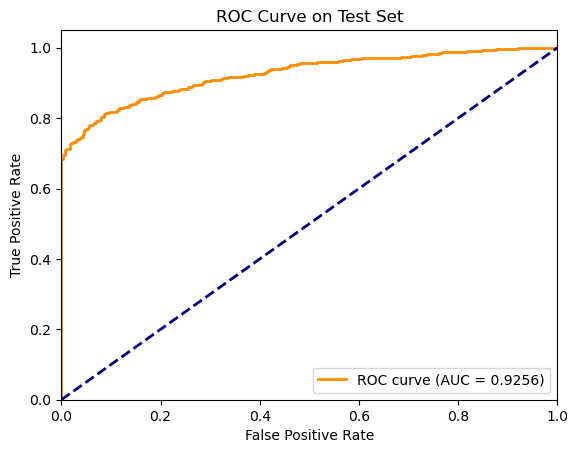

New best AUC found: 0.9256, saving model...


In [17]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
model = CNNModel().to(device)
criterion = nn.CrossEntropyLoss()
#optimizer = optim.Adam(model.parameters(), lr=0.0001)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def load_model(model, path='benchmark1_best_sequence_model2.pth'):
    model.load_state_dict(torch.load(path))
    print(f'Model loaded from {path}')

def test_model(model, test_loader, criterion, model_path=None, best_auc=0.0, save_path='benchmark1_best_sequence_model2.pth'):
    if model_path:
        load_model(model, model_path)
    model.eval()
    running_loss = 0.0
    all_labels = []
    all_predictions = []
    all_scores = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            scores = torch.nn.functional.softmax(outputs, dim=1)[:, 1]

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
            all_scores.extend(scores.cpu().numpy())

    final_loss = running_loss / len(test_loader.dataset)
    test_acc, test_auc, test_mcc, test_sens, test_spec = calculate_metrics(all_labels, all_predictions, all_scores)

    print(f'Test Loss: {final_loss:.4f}, Accuracy: {test_acc*100:.2f}%, '
          f'AUC: {test_auc:.4f}, SENS: {test_sens:.4f}, SPEC: {test_spec:.4f}, MCC: {test_mcc:.4f}')
    
    fpr, tpr, _ = roc_curve(all_labels, all_scores)
    roc_auc = auc(fpr, tpr)
    #np.save('ROC_sequence_fpr.npy', fpr)
    #np.save('ROC_sequence_tpr.npy', tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve on Test Set')
    plt.legend(loc="lower right")
    plt.show()

    if test_auc > best_auc:
        print(f'New best AUC found: {test_auc:.4f}, saving model...')
        #save_model(model, save_path)
        best_auc = test_auc

    return best_auc

# Example usage assuming your model is already initialized and you have the path to the pre-trained model:
best_auc = 0.0  # Initial best AUC value
model_path = 'benchmark1_best_sequence_model2.pth'  # Specify your pre-trained model path
best_auc = test_model(model, test_loader, criterion, model_path, best_auc, save_path='benchmark1_best_sequence_model2.pth')

Model loaded from benchmark1_best_sequence_model2.pth
Test Loss: 0.3859, Accuracy: 84.35%, AUC: 0.9280, MCC: 0.6310, SENS: 0.7796, SPEC: 1.0000


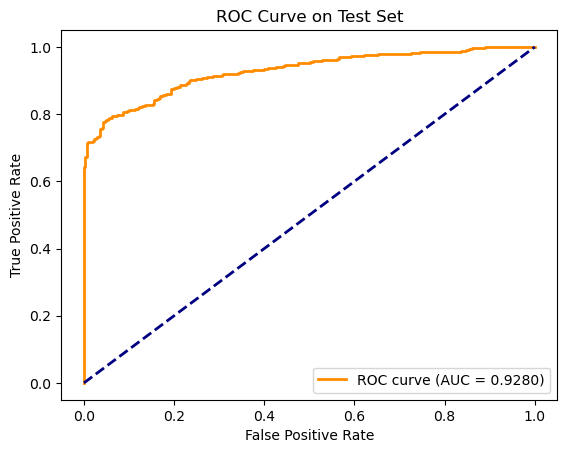

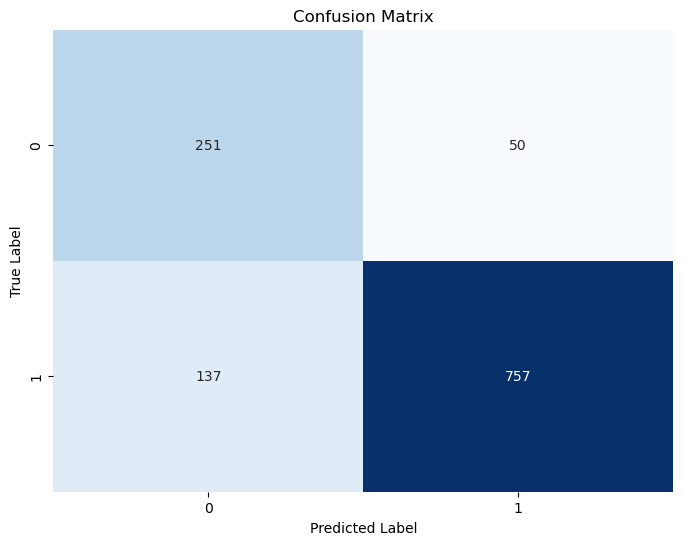

New best AUC found: 0.9280, saving model...


In [17]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, matthews_corrcoef
import seaborn as sns

model = CNNModel().to(device)
criterion = nn.CrossEntropyLoss()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def load_model(model, path):
    model.load_state_dict(torch.load(path, map_location=device))
    print(f'Model loaded from {path}')

def calculate_metrics(y_true, y_pred, y_scores):
    accuracy = accuracy_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    sensitivity = tpr[np.argmin(np.abs(fpr - 0.05))]  # Approximation
    specificity = 1 - fpr[np.argmax(np.abs(tpr - 0.95))]  # Approximation
    return accuracy, roc_auc, mcc, sensitivity, specificity

def test_model(model, test_loader, criterion, model_path=None, best_auc=0.0, save_path='benchmark1_best_sequence_model2.pth'):
    if model_path:
        load_model(model, model_path)
    model.eval()
    running_loss = 0.0
    all_labels = []
    all_predictions = []
    all_scores = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            scores = torch.nn.functional.softmax(outputs, dim=1)[:, 1]

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
            all_scores.extend(scores.cpu().numpy())

    final_loss = running_loss / len(test_loader.dataset)
    test_acc, test_auc, test_mcc, test_sens, test_spec = calculate_metrics(all_labels, all_predictions, all_scores)
    print(f'Test Loss: {final_loss:.4f}, Accuracy: {test_acc*100:.2f}%, AUC: {test_auc:.4f}, MCC: {test_mcc:.4f}, SENS: {test_sens:.4f}, SPEC: {test_spec:.4f}')

    # 绘制ROC曲线
    fpr, tpr, _ = roc_curve(all_labels, all_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve on Test Set')
    plt.legend(loc="lower right")
    plt.show()

    # 绘制混淆矩阵
    cm = confusion_matrix(all_labels, all_predictions)
    #np.save('seq_all_labels.npy', all_labels)
    #np.save('seq_predictions.npy', all_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    if test_auc > best_auc:
        print(f'New best AUC found: {test_auc:.4f}, saving model...')
        # save_model(model, save_path)
        best_auc = test_auc

    return best_auc

# Example usage assuming your model is already initialized and you have the path to the pre-trained model:
best_auc = 0.0  # Initial best AUC value
model_path = 'benchmark1_best_sequence_model2.pth'  # Specify your pre-trained model path
best_auc = test_model(model, test_loader, criterion, model_path, best_auc, save_path='benchmark1_best_sequence_model2.pth')


Test Loss: 0.9152, Accuracy: 84.02%, AUC: 0.9256, SENS: 0.7662, SPEC: 1.0000, MCC: 0.6415


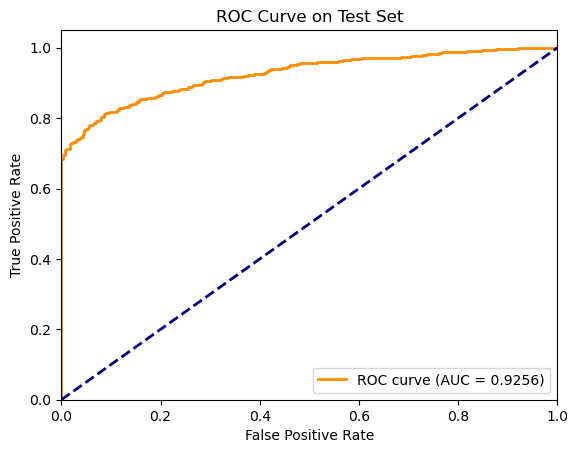

New best AUC found: 0.9256, saving model...


In [13]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# 添加保存模型的函数
def save_model(model, path='benchmark1_best_sequence_model.pth'):
    torch.save(model.state_dict(), path)
    print(f'Model saved to {path}')

# 修改后的 test_model 函数，增加模型保存功能
def test_model(model, test_loader, criterion, best_auc=0.0, save_path='best_sequence_model.pth'):
    model.eval()
    running_loss = 0.0
    all_labels = []
    all_predictions = []
    all_scores = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            scores = torch.nn.functional.softmax(outputs, dim=1)[:, 1]

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
            all_scores.extend(scores.cpu().numpy())

    final_loss = running_loss / len(test_loader.dataset)

    # 计算指标
    test_acc, test_auc, test_mcc, test_sens, test_spec = calculate_metrics(all_labels, all_predictions, all_scores)

    print(f'Test Loss: {final_loss:.4f}, Accuracy: {test_acc*100:.2f}%, '
          f'AUC: {test_auc:.4f}, SENS: {test_sens:.4f}, SPEC: {test_spec:.4f}, MCC: {test_mcc:.4f}')
    
    # 计算 ROC 曲线的坐标
    fpr, tpr, _ = roc_curve(all_labels, all_scores)
    roc_auc = auc(fpr, tpr)
    np.save('ROC_sequence_fpr.npy', fpr)
    np.save('ROC_sequence_tpr.npy', tpr)
    # 绘制 ROC 曲线
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 绘制对角线
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve on Test Set')
    plt.legend(loc="lower right")
    plt.show()

    # 如果当前 AUC 高于最佳 AUC，则保存模型
    if test_auc > best_auc:
        print(f'New best AUC found: {test_auc:.4f}, saving model...')
        #save_model(model, save_path)
        best_auc = test_auc

    return best_auc

# 假设 calculate_metrics 函数已经实现，保存模型路径为 'best_model.pth'
best_auc = 0.0  # 初始最佳 AUC 值
best_auc = test_model(model, eval_loader, criterion, best_auc, save_path='benchmark1_best_sequence_model.pth')